In [1]:
# Course      : DSC630 - Predictive Analytics
# Project     : Credit Card Fraud Detection
# Name        : Vasanthakumar Kalaikkovan, Ganeshkumar Muthusamy and Venkata Kanaparthi

## Problem Statement

Credit card fraud is a major problem in financial services and costs billions of dollars every year. Credit card fraud continues to increase due to the rise and acceleration of Phone Order / Mail Order / E-Commerce. There has been tremendous use of credit cards for online shopping which led to a high amount of fraud related to credit cards. Financial institutions like Visa, MasterCard, Amex, and all debit networks have mandated that banks and merchants introduce EMV card technology to counter the fraud. In 2018, a total of $24.26 Billion was lost due to payment card fraud across the globe, and the USA is the most fraud-prone country. Credit card fraud was ranked the number one type of identity theft fraud. Credit card fraud increased by 18.4% in 2018 and is still climbing. There can be two kinds of card fraud, card-present fraud, and card-not-present fraud.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score
from sklearn.metrics import auc,make_scorer,precision_recall_curve,log_loss
from sklearn.model_selection import cross_val_score
from numpy import mean, std
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import scikitplot as skplt


In [3]:
# Load data into a dataframe
df = pd.read_csv("creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
# Check the dimension of the table
print("The dimension of the table is: ", df.shape)

The dimension of the table is:  (284807, 31)


In [5]:
# What type of variables are in the table 
print("Describe Data")
print(df.describe())

Describe Data
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.33227

In [6]:
# Check if any missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Check the types of each feature
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

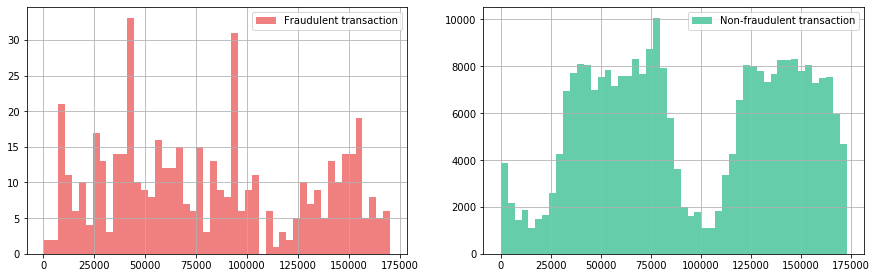

In [8]:
# Histograms fraudulent and non-fraudulent transactions
fraud = df[df.Class == 1]
non_fraud = df[df.Class == 0]
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
fraud.Time.hist(color='#F08080', bins=50, label="Fraudulent transaction")
plt.legend()

plt.subplot(2, 2, 2)
non_fraud.Time.hist(color='#66CDAA', bins=50, label="Non-fraudulent transaction")
plt.legend()

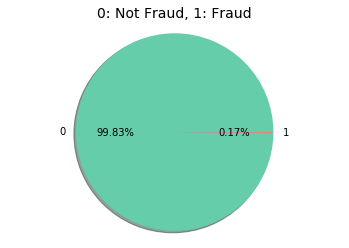

In [9]:
# Pie Chart fradulent % vs non-fradulent %
my_data = "Class"
grouped = df[my_data].value_counts().reset_index()
grouped = grouped.rename(columns = {my_data : "count", "index" : my_data})

labels = grouped[my_data]
sizes = grouped['count']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=0, colors = ['#66CDAA','#F08080'])
ax.axis('equal')
plt.title('0: Not Fraud, 1: Fraud', fontsize=14)
plt.show()

C:\Users\sandy\anaconda3\envs\dsc650\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\sandy\anaconda3\envs\dsc650\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

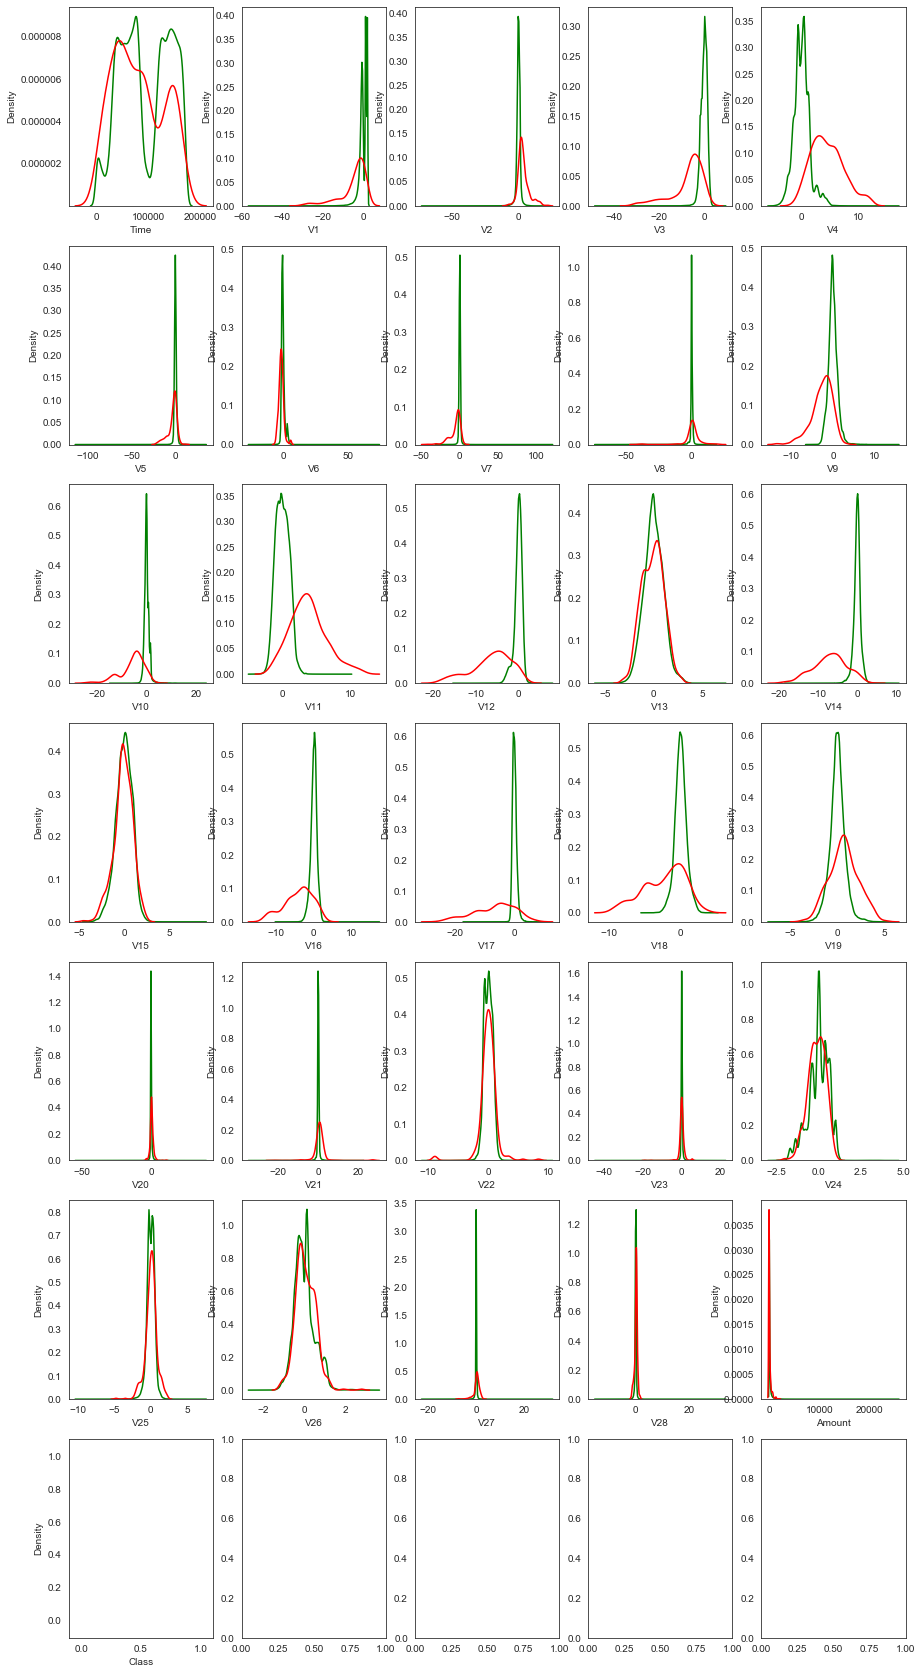

In [10]:
# Density plot of the features
var = df.columns.values

x = 0
non_fraud = df.loc[df['Class'] == 0]
fraud = df.loc[df['Class'] == 1]

sns.set_style('white')
plt.figure()
fig, ax = plt.subplots(7,5,figsize=(15,30))

for feature in var:
    x += 1
    plt.subplot(7,5,x)
    sns.kdeplot(non_fraud[feature],label="Class = 0", color='green')
    sns.kdeplot(fraud[feature],label="Class = 1", color='red')
    plt.xlabel(feature, fontsize=10)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=10)
plt.show();

In [11]:
def topn(df,n):
    npa = df.values
    
    npa = np.tril(npa, -1)
    topn_ind = np.argpartition(npa,-n,None)[-n:] #flatend ind, unsorted
    topn_ind = topn_ind[np.argsort(npa.flat[topn_ind])][::-1] #arg sort in descending order
    cols,indx = np.unravel_index(topn_ind,npa.shape,'F') #unflatten, using column-major ordering
    
    return ([df.columns[c] for c in cols],[df.index[i] for i in indx])

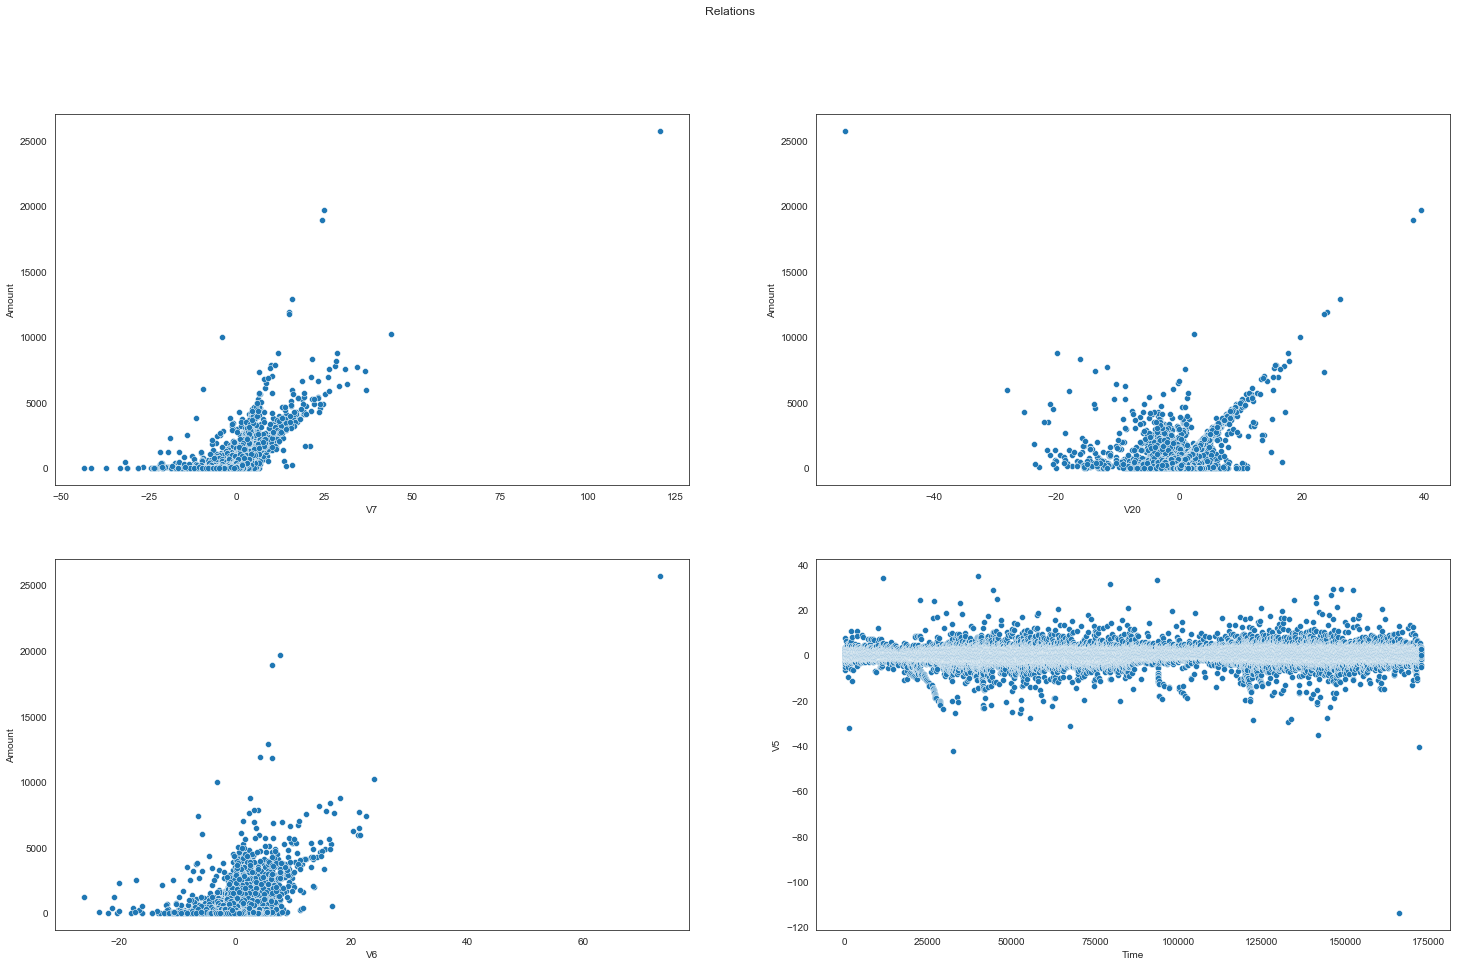

In [12]:
max_corr_x , max_corr_y = topn(df.corr(),4)

fig, axes = plt.subplots(2, 2, figsize=(25, 15))
fig.suptitle('Relations')

axes = axes.reshape(4,)

for i in range(len(max_corr_x)):
    sns.scatterplot(ax = axes[i],data = df, x= max_corr_x[i],y=max_corr_y[i])

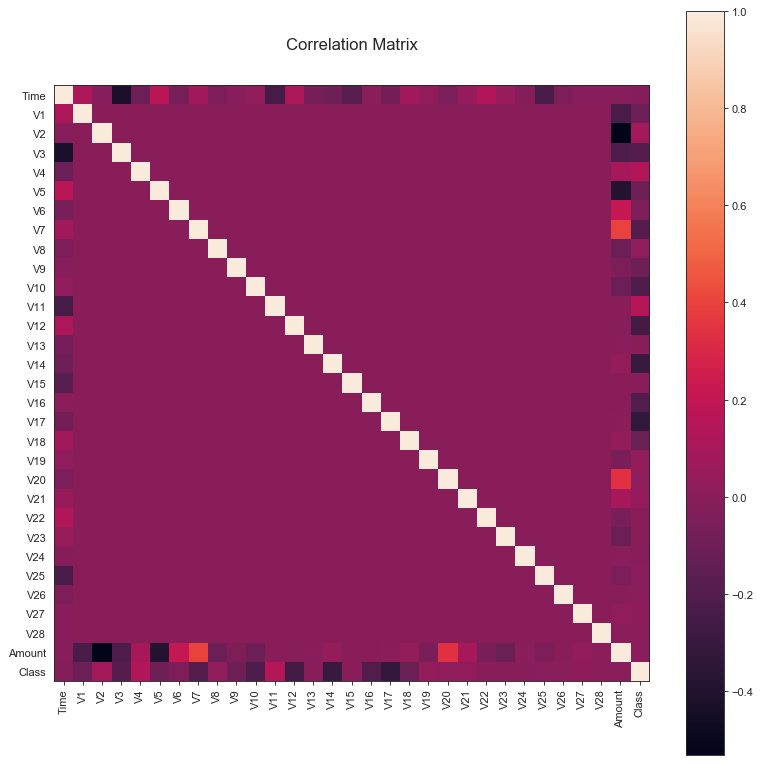

In [13]:
#Correlation Matrix
df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
corr = df.corr()
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix', fontsize=15)
plt.show()

In [14]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Train and Test

In [15]:
# Train and test data
x=df.drop(columns=["Time","Class"],axis="columns")
y=df.Class

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [17]:
# Details of training dataset
print("Shape of x_train dataset: ", x_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of x_test dataset: ", x_test.shape)
print("Shape of y_test dataset: ", y_test.shape)
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Shape of x_train dataset:  (213605, 29)
Shape of y_train dataset:  (213605,)
Shape of x_test dataset:  (71202, 29)
Shape of y_test dataset:  (71202,)
Before OverSampling, counts of label '1': 379
Before OverSampling, counts of label '0': 213226 



After OverSampling, the shape of train_x: (426452, 29)
After OverSampling, the shape of train_y: (426452,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


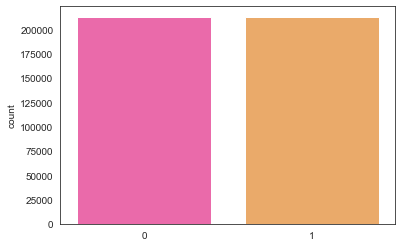

In [18]:
# Oversample the training dataset
sm = SMOTE(random_state=2)
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=df, palette='spring')

In [19]:
# Feature selection using Variance Threshold with threshold of 0.5
var = VarianceThreshold(threshold=.5)
var.fit(x_train_s,y_train_s)
x_train_var=var.transform(x_train_s)
x_test_var=var.transform(x_test)
x_train_var.shape

(426452, 25)

In [20]:
# Alternate way to perform feature selection and display the features
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]
variance_threshold_selector(x_train_s, 0.5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,V23,V27,Amount
0,-1.648591,1.228130,1.370169,-1.735542,-0.029455,-0.484129,0.918645,-0.438750,0.982144,1.241635,...,0.664548,-1.280961,0.184568,-0.331603,0.384201,-0.218076,-0.203458,-0.213015,-0.262968,38.420000
1,-0.234775,-0.493269,1.236728,-2.338793,-1.176733,0.885733,-1.960981,-2.363412,-2.694774,0.360215,...,-0.163459,0.562423,-0.577032,-1.635634,0.364679,-1.495358,-0.083066,0.074612,0.089293,61.200000
2,1.134626,-0.774460,-0.163390,-0.533358,-0.604555,-0.244482,-0.212682,0.040782,-1.136627,0.792009,...,-1.371503,0.020165,0.796223,-0.519459,-0.396476,-0.684454,-1.855269,0.171997,-0.061178,110.950000
3,0.069514,1.017753,1.033117,1.384376,0.223233,-0.310845,0.597287,-0.127658,-0.701533,0.070739,...,-0.507737,-0.024208,0.371960,1.561447,0.148760,0.097023,0.369957,-0.219266,0.114440,10.000000
4,-0.199441,0.610092,-0.114437,0.256565,2.290752,4.008475,-0.123530,1.038374,-0.075846,0.030453,...,-0.541172,-0.174950,0.355749,1.375281,0.292972,-0.019733,0.165463,-0.080978,0.481769,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426447,1.065197,0.639987,0.203695,3.005300,-0.066426,0.058743,-0.365901,0.318517,-0.139786,-0.311478,...,1.110343,1.651054,1.223993,-0.872929,-0.193495,-0.087659,-0.084135,-0.126067,0.046251,1.725917
426448,-6.689924,2.108646,-7.070325,5.133202,-2.313166,-2.003876,-8.549248,0.674817,-3.590065,-8.093407,...,-7.755543,-12.704684,-4.443473,2.498435,0.070287,0.067269,0.467306,-0.642386,1.339039,0.864189
426449,-0.415163,-0.973361,-2.162616,2.541888,0.707195,-0.199787,1.793974,-0.182592,-0.794665,-0.302585,...,-0.843149,1.686313,1.296810,2.017400,1.171567,0.451141,0.535937,1.149598,-0.019759,453.619063
426450,0.172346,0.879474,1.678842,3.136607,-0.697444,1.213229,-1.449331,-1.552406,-0.848937,0.131740,...,0.278056,0.626466,0.512756,0.001894,0.495637,-0.788119,0.929233,-0.117767,0.112793,0.339493


In [21]:
varth_features=var.get_support()
varth_features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False,  True])

In [22]:
# Feature selection using SelectKBest feature selection
skbest = SelectKBest(k=10)
skbest.fit(x_train_s,y_train_s)
x_train_skbest=skbest.transform(x_train_s)
x_test_skbest=skbest.transform(x_test)
x_train_skbest.shape

(426452, 10)

In [23]:
kbest_features=skbest.get_support()
kbest_features

array([False,  True,  True,  True, False, False, False, False,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [24]:
# 10 best features using SelectKBest
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(x_train_s,y_train_s)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x_train_s.columns)
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(10,'Score'))         # print 10 best features

   Feature_Name          Score
13          V14  634408.764309
3            V4  477637.117795
10          V11  422096.275092
11          V12  415541.515783
9           V10  307081.858759
15          V16  240824.011003
8            V9  219463.452793
2            V3  203528.966849
16          V17  202096.481017
1            V2  151952.766954


In [25]:
# calculate precision recall area under curve
def preci_auc(y_true, pred_prob):
   # calculate precision-recall curve
    p, r, _ = precision_recall_curve(y_true, pred_prob)
    # calculate area under curve
    return auc(r, p)

In [26]:
# Evaluate a model
def evaluate_model(x, y, model):
    # Define evaluation procedure
    CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Define the model evaluation the metric
    metric = make_scorer(preci_auc, needs_proba=True)
    # Evaluate model
    scores = cross_val_score(model, x, y, scoring='roc_auc', cv=CV, n_jobs=-1)
    return scores

In [69]:
print(y_train_s)

[1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0
 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1
 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1
 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0
 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1
 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1
 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1
 0 1 1 1 0 0 0 0 1 0 0 1 

In [27]:
# define the reference model
model = DummyClassifier(strategy='constant', constant=1)
# Evaluate the model
scores = evaluate_model(x_train_skbest, y_train_s, model)
# summarize performance
print('Mean area under curve: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean area under curve: 0.500 (0.000)


In [28]:
# Normalize the input
scaler = StandardScaler()
scaler.fit(x_train_skbest)
x_train_norm = scaler.transform(x_train_skbest)
x_test_norm = scaler.transform(x_test_skbest)

In [29]:
def model_val(x, y, classifier, scor, show):
  x = np.array(x)
  y = np.array(y)

  scores = cross_val_score(classifier, x, y, scoring=scor)

  if show == True:
    print("Score: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
  
  return scores.mean()

In [30]:
# List of models
rfc = RandomForestClassifier()
ctc = DecisionTreeClassifier()
sglc = SGDClassifier()
lr = LogisticRegression()

model = []
score = []

# Check model score
for classifier in (rfc, ctc, sglc, lr):
    model.append(classifier.__class__.__name__)
    score.append(model_val(x_train_norm, y_train_s, classifier, scor='roc_auc', show=True))

pd.DataFrame(data=score, index=model, columns=['roc_auc'])

Score: 1.00 (+/- 0.00)
Score: 1.00 (+/- 0.00)
Score: 0.99 (+/- 0.00)
Score: 0.99 (+/- 0.00)


,roc_auc
RandomForestClassifier,0.999968
DecisionTreeClassifier,0.997289
SGDClassifier,0.990384
LogisticRegression,0.990506


### Random Forest Model Evaluation

In [31]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])
parm_gridscv_rf = {'model__n_estimators': [75]}
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=parm_gridscv_rf, scoring='roc_auc', n_jobs=-1, 
                       pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_rf.fit(x_train_norm, y_train_s)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring='roc_auc', verbose=1)

In [32]:
pd.DataFrame(grid_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,176.266806,0.686301,0.669283,0.247509,75,{'model__n_estimators': 75},0.999974,0.999987,0.999925,0.999961,0.999959,0.999961,0.000021,1


In [33]:
grid_rf.best_score_, grid_rf.best_params_

(0.9999611455402032, {'model__n_estimators': 75})

### Test Random Forest model

In [34]:
# Prediction for the test set
y_pred_test = grid_rf.predict(x_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_test), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred_test, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score = grid_rf.predict_proba(x_test_norm)[:,1]
    except:
        y_score = grid_rf.decision_function(x_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))

Confusion Matrix
[[71049    40]
 [   13   100]] 

Classification report
              precision    recall  f1-score   support

           0    0.99982   0.99944   0.99963     71089
           1    0.71429   0.88496   0.79051       113

    accuracy                        0.99926     71202
   macro avg    0.85705   0.94220   0.89507     71202
weighted avg    0.99936   0.99926   0.99930     71202

Scalar Metrics
        AUROC = 0.98299


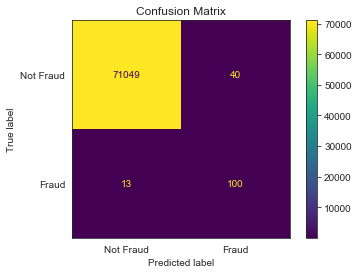

In [35]:
# Plot confusion matrix
con_mat=confusion_matrix(y_test,y_pred_test,labels=[0,1])
cmatrix=ConfusionMatrixDisplay(confusion_matrix=con_mat,display_labels=["Not Fraud","Fraud"])
cmatrix.plot()
plt.title("Confusion Matrix")
plt.show()

In [36]:
log_loss(y_test, y_pred_test)

0.025709771254003325

### Logistic Regression Model Evaluation

In [37]:
# Logistic regression model with different C values
parameters = {
    'tol': [0.00001, 0.0001, 0.001],
    'C': [1, 50, 100]
}

lgr = GridSearchCV(LogisticRegression(random_state=101, n_jobs=1, max_iter=1000),
                     param_grid=parameters,
                     cv=3,
                     n_jobs=1,
                     scoring='roc_auc'
                    )
lgr.fit(x_train_norm, y_train_s)
clf = lgr.best_estimator_

print(lgr.best_estimator_)
print("The best classifier score:",lgr.best_score_)

LogisticRegression(C=1, max_iter=1000, n_jobs=1, random_state=101, tol=1e-05)
The best classifier score: 0.9905075847918005


### Test Logistic Regression Model

In [38]:
y_pred_test1 = clf.predict(x_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_test1), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred_test1, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score1 = clf.predict_proba(x_test_norm)[:,1]
    except:
        y_score1 = clf.decision_function(X_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score1)))

Confusion Matrix
[[69651  1438]
 [    9   104]] 

Classification report
              precision    recall  f1-score   support

           0    0.99987   0.97977   0.98972     71089
           1    0.06744   0.92035   0.12568       113

    accuracy                        0.97968     71202
   macro avg    0.53366   0.95006   0.55770     71202
weighted avg    0.99839   0.97968   0.98835     71202

Scalar Metrics
        AUROC = 0.97698


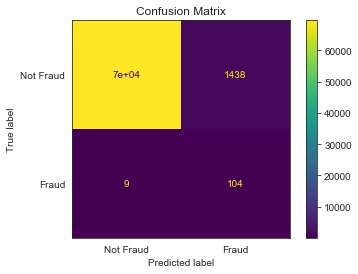

In [39]:
# Plot confusion matrix
con_mat1=confusion_matrix(y_test,y_pred_test1,labels=[0,1])
cmatrix1=ConfusionMatrixDisplay(confusion_matrix=con_mat1,display_labels=["Not Fraud","Fraud"])
cmatrix1.plot()
plt.title("Confusion Matrix")
plt.show()

In [40]:
log_loss(y_test, y_pred_test1)

0.7019291489640804

### Train and Test after balancing

In [41]:
df = df.sample(frac=1)

# Taking only few sample cases where length of sample is equal to number of fraud cases.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0].sample(len(fraud_df))

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
82203,59297.0,-1.497830,0.416170,1.376157,-0.314066,0.013404,1.600484,-0.317423,1.184969,0.681709,...,0.063526,0.435384,-0.041695,-0.939038,-0.294700,0.495365,0.154457,0.055988,42.83,0
6472,7740.0,1.023874,2.001485,-4.769752,3.819195,-1.271754,-1.734662,-3.059245,0.889805,0.415382,...,0.343283,-0.054196,0.709654,-0.372216,-2.032068,0.366778,0.395171,0.020206,1.00,1
178770,123773.0,-0.455813,-0.445863,1.417564,-2.186096,-0.014905,-0.269283,-0.398378,0.131809,-0.515831,...,0.541944,1.489233,-0.206443,0.730607,-0.166953,-0.139967,0.149268,0.173233,9.95,0
143333,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1
149587,91524.0,1.954852,1.630056,-4.337200,2.378367,2.113348,-1.583851,0.653745,-0.192892,1.217608,...,-0.474437,-0.974625,-0.048155,-0.023524,0.362192,-0.570709,0.025619,0.081880,1.00,1


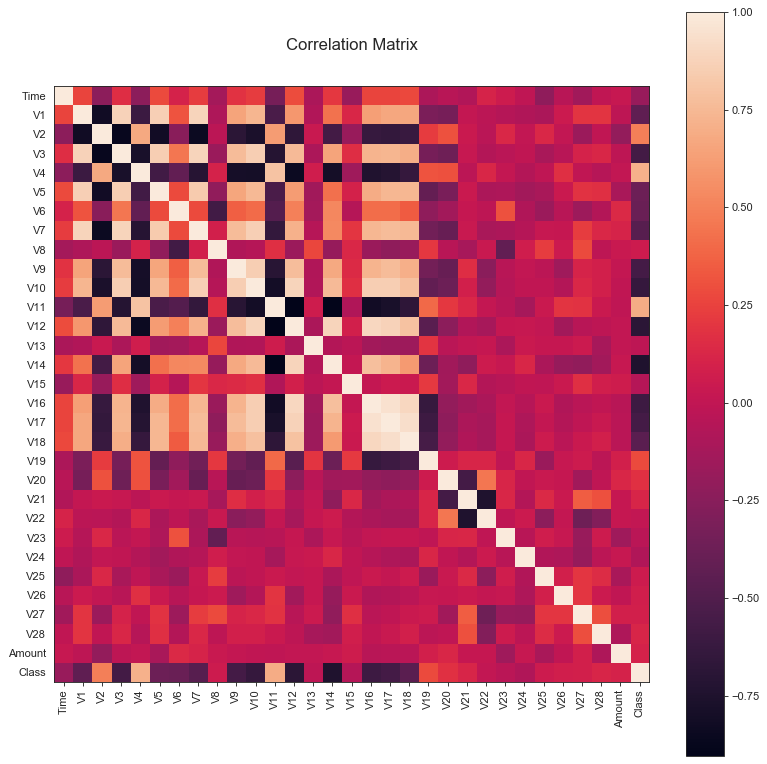

In [42]:
#Correlation Matrix
new_df = new_df[[col for col in new_df if new_df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
corr = new_df.corr()
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix', fontsize=15)
plt.show()

In [43]:
# Train and test data
x=new_df.drop(columns=["Time","Class"],axis="columns")
y=new_df.Class

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [45]:
# Details of training dataset
print("Shape of x_train dataset: ", x_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of x_test dataset: ", x_test.shape)
print("Shape of y_test dataset: ", y_test.shape)
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Shape of x_train dataset:  (738, 29)
Shape of y_train dataset:  (738,)
Shape of x_test dataset:  (246, 29)
Shape of y_test dataset:  (246,)
Before OverSampling, counts of label '1': 355
Before OverSampling, counts of label '0': 383 



After OverSampling, the shape of train_x: (766, 29)
After OverSampling, the shape of train_y: (766,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


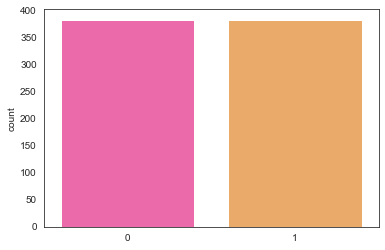

In [46]:
# Oversample the training dataset
sm = SMOTE(random_state=2)
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=new_df, palette='spring')

In [47]:
# Feature selection using Variance Threshold with threshold of 0.5
var = VarianceThreshold(threshold=.5)
var.fit(x_train_s,y_train_s)
x_train_var=var.transform(x_train_s)
x_test_var=var.transform(x_test)
x_train_var.shape

(766, 26)

In [48]:
# Alternate way to perform feature selection and display the features
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]
variance_threshold_selector(x_train_s, 0.5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V17,V18,V19,V20,V21,V22,V23,V25,V27,Amount
0,-0.440095,1.137239,-3.227080,3.242293,-2.033998,-1.618415,-3.028013,0.764555,-1.801937,-4.711769,...,-6.823831,-1.355309,0.291251,0.895841,0.764187,-0.275578,-0.343572,0.606434,0.768291,227.300000
1,-1.532272,1.127587,0.037932,-0.834213,2.490538,3.539277,0.119496,0.583649,0.083489,1.214248,...,-0.634236,0.307268,1.312065,0.515302,-0.201605,-0.348970,-0.266667,0.453865,-0.198909,6.740000
2,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,-12.965481,...,-18.716765,-6.522015,3.517955,0.483930,2.502772,0.481691,0.480958,-0.293354,-0.203917,44.900000
3,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,-8.337707,...,-12.719207,-3.740176,0.844060,2.172709,1.376938,-0.792017,-0.771414,0.718717,1.277707,512.250000
4,-25.942434,14.601998,-27.368650,6.378395,-19.104033,-4.684806,-18.261393,17.052566,-3.742605,-8.233721,...,-12.061696,-4.773349,0.852970,1.667304,1.784316,-1.917759,-1.235787,1.820378,1.388786,99.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,0.551237,3.872917,-6.468071,6.625091,1.375885,-2.550616,-1.100003,0.305251,-2.271800,-4.634569,...,1.401837,1.218038,-1.412641,0.359454,0.248348,-0.317357,-0.218862,0.399076,0.567390,1.000000
762,-6.300921,1.785727,-7.284904,5.190317,-3.155158,-1.968815,-6.617152,2.811177,-3.770905,-8.168823,...,-12.670492,-4.237174,2.357046,-0.154225,1.068144,0.017388,0.499898,0.545627,1.017411,0.695292
763,-6.961706,5.771225,-12.275260,5.956623,-6.688290,-2.163590,-7.460634,3.334037,-4.299913,-9.531083,...,-13.075847,-4.806044,1.966896,-0.379327,1.248311,0.573714,-0.708567,-0.841764,-0.189071,352.102022
764,-0.573335,1.103806,-3.251557,3.266343,-2.028379,-1.636157,-3.048801,0.797286,-1.815689,-4.710793,...,-6.801321,-1.344146,0.324636,0.899652,0.765503,-0.272296,-0.347004,0.579797,0.785346,227.711207


In [49]:
varth_features=var.get_support()
varth_features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True])

In [50]:
# Feature selection using SelectKBest feature selection
skbest = SelectKBest(k=10)
skbest.fit(x_train_s,y_train_s)
x_train_skbest=skbest.transform(x_train_s)
x_test_skbest=skbest.transform(x_test)
x_train_skbest.shape

(766, 10)

In [51]:
kbest_features=skbest.get_support()
kbest_features

array([False,  True,  True,  True, False, False, False, False,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [52]:
# 10 best features using SelectKBest
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(x_train_s,y_train_s)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x_train_s.columns)
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(10,'Score'))         # print 10 best features

   Feature_Name        Score
13          V14  1002.424842
3            V4   830.394974
11          V12   739.389452
10          V11   726.366351
9           V10   535.778652
15          V16   418.876388
2            V3   372.856045
8            V9   348.944076
16          V17   332.817844
1            V2   229.094464


In [53]:
# calculate precision recall area under curve
def preci_auc(y_true, pred_prob):
   # calculate precision-recall curve
    p, r, _ = precision_recall_curve(y_true, pred_prob)
    # calculate area under curve
    return auc(r, p)

In [54]:
# Evaluate a model
def evaluate_model(x, y, model):
    # Define evaluation procedure
    CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Define the model evaluation the metric
    metric = make_scorer(preci_auc, needs_proba=True)
    # Evaluate model
    scores = cross_val_score(model, x, y, scoring='roc_auc', cv=CV, n_jobs=-1)
    return scores

In [55]:
# define the reference model
model = DummyClassifier(strategy='constant', constant=1)
# Evaluate the model
scores = evaluate_model(x_train_skbest, y_train_s, model)
# summarize performance
print('Mean area under curve: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean area under curve: 0.500 (0.000)


In [56]:
# Normalize the input
scaler = StandardScaler()
scaler.fit(x_train_skbest)
x_train_norm = scaler.transform(x_train_skbest)
x_test_norm = scaler.transform(x_test_skbest)

In [57]:
def model_val(x, y, classifier, scor, show):
  x = np.array(x)
  y = np.array(y)

  scores = cross_val_score(classifier, x, y, scoring=scor)

  if show == True:
    print("Score: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
  
  return scores.mean()

In [58]:
# List of models
rfc = RandomForestClassifier()
ctc = DecisionTreeClassifier()
sglc = SGDClassifier()
lr = LogisticRegression()

model = []
score = []

# Check model score
for classifier in (rfc, ctc, sglc, lr):
    model.append(classifier.__class__.__name__)
    score.append(model_val(x_train_norm, y_train_s, classifier, scor='roc_auc', show=True))

pd.DataFrame(data=score, index=model, columns=['roc_auc'])

Score: 0.98 (+/- 0.01)
Score: 0.91 (+/- 0.01)
Score: 0.98 (+/- 0.01)
Score: 0.98 (+/- 0.00)


,roc_auc
RandomForestClassifier,0.978535
DecisionTreeClassifier,0.909962
SGDClassifier,0.981337
LogisticRegression,0.981607


### Random Forest Model Evaluation after balancing

In [59]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])
parm_gridscv_rf = {'model__n_estimators': [75]}
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=parm_gridscv_rf, scoring='roc_auc', n_jobs=-1, 
                       pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_rf.fit(x_train_norm, y_train_s)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring='roc_auc', verbose=1)

In [60]:
pd.DataFrame(grid_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.392332,0.032625,0.115251,0.004927,75,{'model__n_estimators': 75},0.975291,0.983339,0.97095,0.979238,0.993763,0.980516,0.007796,1


In [61]:
grid_rf.best_score_, grid_rf.best_params_

(0.9805161516542242, {'model__n_estimators': 75})

### Test Random Forest model after balancing

In [62]:
# Prediction for the test set
y_pred_test = grid_rf.predict(x_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_test), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred_test, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score = grid_rf.predict_proba(x_test_norm)[:,1]
    except:
        y_score = grid_rf.decision_function(x_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))

Confusion Matrix
[[107   2]
 [ 17 120]] 

Classification report
              precision    recall  f1-score   support

           0      0.863     0.982     0.918       109
           1      0.984     0.876     0.927       137

    accuracy                          0.923       246
   macro avg      0.923     0.929     0.923       246
weighted avg      0.930     0.923     0.923       246

Scalar Metrics
        AUROC = 0.961


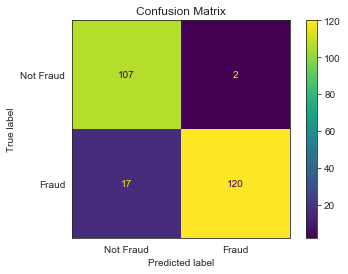

In [63]:
# Plot confusion matrix
con_mat=confusion_matrix(y_test,y_pred_test,labels=[0,1])
cmatrix=ConfusionMatrixDisplay(confusion_matrix=con_mat,display_labels=["Not Fraud","Fraud"])
cmatrix.plot()
plt.title("Confusion Matrix")
plt.show()

In [64]:
log_loss(y_test, y_pred_test)

2.667635571943754

### Logistic Regression Model Evaluation after balancing

In [65]:
# Logistic regression model with different C values
parameters = {
    'tol': [0.00001, 0.0001, 0.001],
    'C': [1, 50, 100]
}

lgr = GridSearchCV(LogisticRegression(random_state=101, n_jobs=1, max_iter=1000),
                     param_grid=parameters,
                     cv=3,
                     n_jobs=1,
                     scoring='roc_auc'
                    )
lgr.fit(x_train_norm, y_train_s)
clf = lgr.best_estimator_

print(lgr.best_estimator_)
print("The best classifier score:",lgr.best_score_)

LogisticRegression(C=1, max_iter=1000, n_jobs=1, random_state=101, tol=1e-05)
The best classifier score: 0.9822927560080381


### Test Logistic Regression Model after balancing

In [66]:
y_pred_test1 = clf.predict(x_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_test1), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred_test1, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score1 = clf.predict_proba(x_test_norm)[:,1]
    except:
        y_score1 = clf.decision_function(X_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score1)))

Confusion Matrix
[[109   0]
 [ 16 121]] 

Classification report
              precision    recall  f1-score   support

           0      0.872     1.000     0.932       109
           1      1.000     0.883     0.938       137

    accuracy                          0.935       246
   macro avg      0.936     0.942     0.935       246
weighted avg      0.943     0.935     0.935       246

Scalar Metrics
        AUROC = 0.978


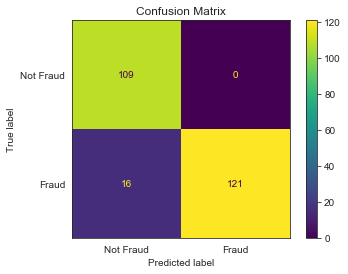

In [67]:
# Plot confusion matrix
con_mat1=confusion_matrix(y_test,y_pred_test1,labels=[0,1])
cmatrix1=ConfusionMatrixDisplay(confusion_matrix=con_mat1,display_labels=["Not Fraud","Fraud"])
cmatrix1.plot()
plt.title("Confusion Matrix")
plt.show()

In [68]:
log_loss(y_test, y_pred_test1)

2.246424480969801